<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [28]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [30]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [31]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


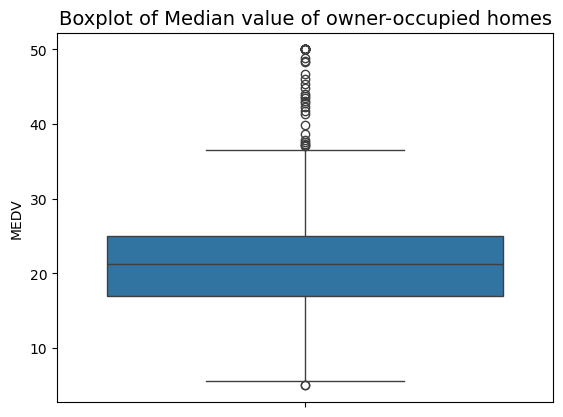

In [33]:
## boxplot for the -Median value of owner-occupied homes-
ax = sns.boxplot(y='MEDV', data = boston_df)
plt.title('Boxplot of Median value of owner-occupied homes', fontsize=14)
plt.show()

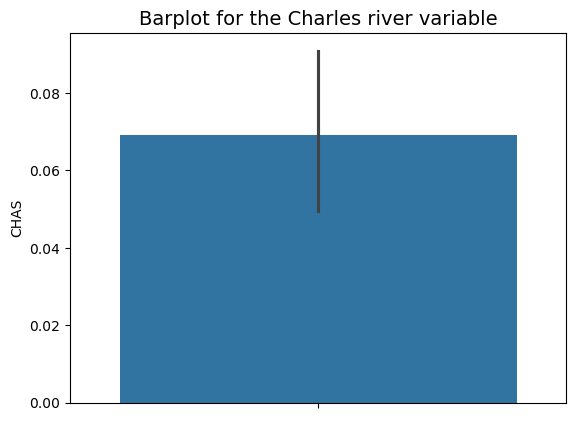

In [34]:
## barplot for for the Charles river variable
ax = sns.barplot( y ='CHAS', data = boston_df)
plt.title('Barplot for the Charles river variable', fontsize=14)
plt.show()

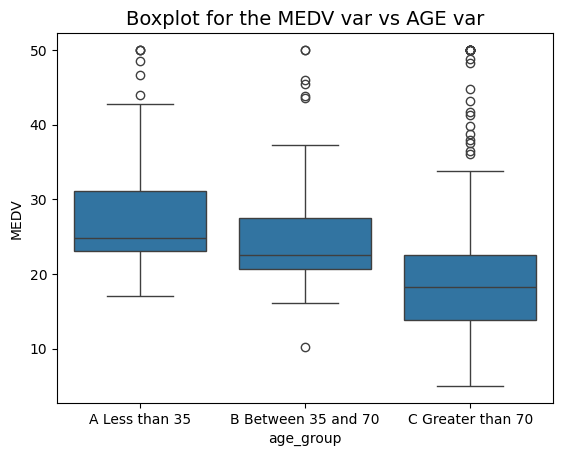

In [35]:
## boxplot for the MEDV variable vs the AGE variable.
## Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

boston_df.loc[(boston_df['AGE'] <=35), 'age_group'] = 'A Less than 35'
boston_df.loc[(boston_df['AGE'] >35) & (boston_df['AGE'] <=70), 'age_group'] = 'B Between 35 and 70'
boston_df.loc[(boston_df['AGE'] >70), 'age_group'] = 'C Greater than 70'

order = ['A Less than 35','B Between 35 and 70','C Greater than 70']

less35 = boston_df[boston_df['age_group'] == 'A Less than 35']['MEDV']
bw3570 = boston_df[boston_df['age_group'] == 'B Between 35 and 70']['MEDV']
greater70 = boston_df[boston_df['age_group'] == 'C Greater than 70']['MEDV']

ax = sns.boxplot(y='MEDV', x='age_group', data = boston_df, order= order)
plt.title('Boxplot for the MEDV var vs AGE var', fontsize=14)
plt.show()

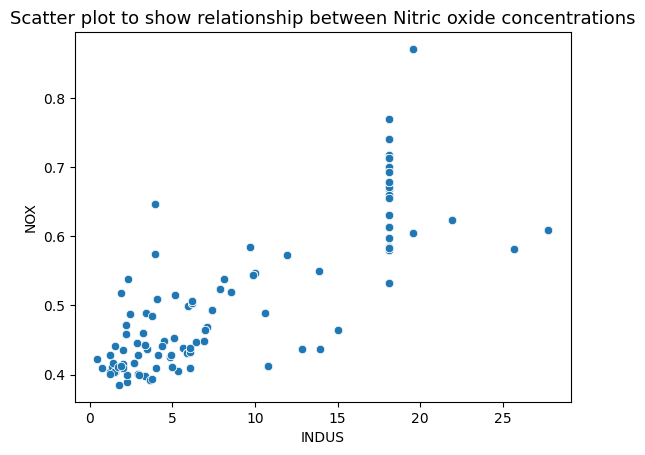

In [36]:
## Provide a scatter plot to show the relationship between Nitric oxide concentrations
## and the proportion of non-retail business acres per town. What can you say about the
## relationship?
ax = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
plt.title('Scatter plot to show relationship between Nitric oxide concentrations', fontsize=13)
plt.show()

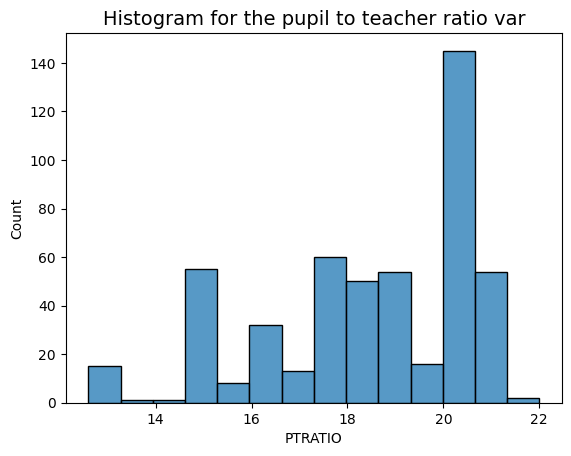

In [37]:
# Create a histogram for the pupil to teacher ratio variable
ax = sns.histplot(data = boston_df['PTRATIO'])
plt.title('Histogram for the pupil to teacher ratio var', fontsize=14)
plt.show()

In [38]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0 ]['MEDV'])
## p values is very low so less than reasonable alpha so reject the null meaning yes significant difference
## is there between median house values bounded by charles or not

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [39]:
## Is there a difference in Median values of houses (MEDV) for each proportion of
## owner occupied units built prior to 1940 (AGE)? (ANOVA)
## Alpha : 0.05
## H0: There is no diff between MEDV and AGE

boston_df.loc[(boston_df['AGE'] >=84), 'Older1940'] = 1
boston_df.loc[(boston_df['AGE'] <84), 'Older1940'] = 0
boston_df
Older1940 = boston_df[(boston_df['Older1940'] ==1)]['MEDV']
NotOlder1940 = boston_df[(boston_df['Older1940'] ==0)]['MEDV']

scipy.stats.f_oneway(Older1940, NotOlder1940)

F_onewayResult(statistic=71.334018088109, pvalue=3.2403818036980184e-16)

In [40]:
## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of
## non-retail business acres per town? (Pearson Correlation)
## H0: There is no relation beween NOX and INDUS
## alpha is 0.05
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
# the pvalue is much lower than alpha thus we reject the H0 and conclude that there is relation beween NOX and INDUS

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [41]:
## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
## H0:
## Alpha: 0.05
## H0: There is no impact of DIS to MEDV

x = boston_df['DIS']
Y = boston_df['MEDV']

X = sm.add_constant(x)
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
model.summary()

## as Prob(F statistic) is lower than alpha, we reject H0 and conclude there is a
## relationship between dis and medv. As te rsquared is 0.062 we concluce that
## the relation is weak positive linear

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        09:36:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""